In [5]:
import pandas as pd
%pylab inline

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

from string import letters

from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
import numpy as np
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


In [6]:
rs = pd.read_csv("Reddit_test_1.csv")

In [9]:
rs

,Entry Id,Please indicate your gender.,Please select the category that includes your age.,What is your marital status?,What best describes your employment status?,Are you or have you ever been in military service?,Do you currently have children under the age of 18 living in your household?,What best describes your level of education?,Treated country data,(For U. S. redditors) In which state do you live?,Which one of the following ranges includes your total yearly household income before taxes?,treated subreddit data,Are you a dog or a cat person?,"If you were a cheese, what cheese would you be?",Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,1,Male,25-34,Blank,Employed full time,none,No,Bachelor's degree,United States,New York,"$150,000 or more",getmotivated,none,none,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Male,25-34,Blank,Employed full time,none,No,Bachelor's degree,United States,New York,"$150,000 or more",gaming,none,none,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Female,18-24,Blank,Freelance,none,No,Some college,United States,Virginia,"Under $20,000",snackexchange,none,none,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Male,25-34,Blank,Freelance,none,No,Bachelor's degree,United States,New York,"$150,000 or more",spacedicks,none,none,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Female,25-34,Blank,Employed full time,none,No,Bachelor's degree,United States,California,"$70,000 - $99,999",aww,none,none,NaN,NaN,NaN,NaN,NaN,NaN
5,6,Male,25-34,Married/civil union/domestic partnership,Employed full time,No,No,Bachelor's degree,United States,New York,"$150,000 or more",gaming,I like dogs.,Cheddar,NaN,NaN,NaN,NaN,NaN,NaN
6,7,Male,25-34,In a relationship,Employed full time,No,No,Some college,Germany,NaN,none,python,I like dogs.,Cheddar,NaN,NaN,NaN,NaN,NaN,NaN
7,8,Male,18-24,Married/civil union/domestic partnership,"Not employed, but looking for work",No,No,Bachelor's degree,United States,California,"$70,000 - $99,999",fffffffuuuuuuuuuuuu,I like dogs.,American,NaN,NaN,NaN,NaN,NaN,NaN
8,9,Male,35-44,Married/civil union/domestic partnership,Employed full time,No,No,Bachelor's degree,United States,New York,"$150,000 or more",todayilearned,I like cats.,Provolone,NaN,NaN,NaN,NaN,NaN,NaN
9,10,Male,25-34,In a relationship,Freelance,No,No,Some college,Germany,NaN,"$70,000 - $99,999",NaN,I like cats.,Munster,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
rs.columns

Index([u'Entry Id', u'Please indicate your gender.',
       u'Please select the category that includes your age.',
       u'What is your marital status?',
       u'What best describes your employment status?',
       u'Are you or have you ever been in military service?',
       u'Do you currently have children under the age of 18 living in your household?',
       u'What best describes your level of education?',
       u'Treated country data',
       u'(For U. S. redditors) In which state do you live?',
       u'Which one of the following ranges includes your total yearly household income before taxes?',
       u'treated subreddit data', u'Are you a dog or a cat person?',
       u'If you were a cheese, what cheese would you be?', u'Unnamed: 14',
       u'Unnamed: 15', u'Unnamed: 16', u'Unnamed: 17', u'Unnamed: 18',
       u'Unnamed: 19'],
      dtype='object')

In [11]:
rs.shape


(32754, 20)

# EDA 

In [12]:
del rs['Unnamed: 14']
del rs['Unnamed: 15']
del rs['Unnamed: 16']
del rs['Unnamed: 17']
del rs['Unnamed: 18']
del rs['Unnamed: 19']

In [117]:
rs = rs.rename(columns ={
        'Entry Id' : 'EntryId',
    'Please indicate your gender.': 'Gender',
     'Please select the category that includes your age.':'Age',   
    'What is your marital status?':'Mari_Status',
    'What best describes your employment status?':'Emp_Status',
    'Are you or have you ever been in military service?':'Military_Service',
    'Do you currently have children under the age of 18 living in your household?': 'Children_Under18',
    'What best describes your level of education?':'Edu_Level',
    'Treated country data':'Country',
    '(For U. S. redditors) In which state do you live?':'State',
    'Which one of the following ranges includes your total yearly household income before taxes?':'IncomeTaxes',
    'treated subreddit data':'Subreddit',
    'Are you a dog or a cat person?':'like_CatsOrDogs',
    'If you were a cheese, what cheese would you be?':'Cheese_You'
    })

In [83]:
rs.columns

Index([u'EntryId', u'Gender', u'Age', u'Mari_Status', u'Emp_Status',
       u'Military_Service', u'Children_Under18', u'Education', u'Country',
       u'State', u'IncomeBeforeTaxes', u'Subreddit', u'like_CatsOrDogs',
       u'Cheese_You'],
      dtype='object')

In [62]:
rs.Gender.value_counts()

Male      26415
Female     6133
None        201
Name: Gender, dtype: int64

In [63]:
rs[rs.Gender.isnull()]

,EntryId,Gender,Age,Mari_Status,Emp_Status,Military_Service,Children_Under18,Education,Country,State,IncomeBeforeTaxes,Subreddit,like_CatsOrDogs,Cheese_You


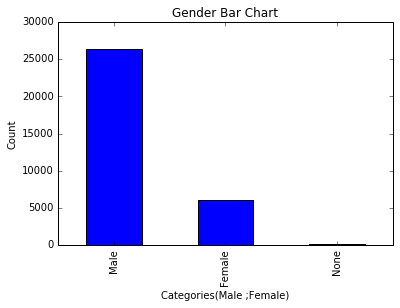

In [64]:
Gender_plot = rs.Gender.value_counts().plot(kind = 'bar' )
Gender_plot.set_title("Gender Bar Chart")
Gender_plot.set_xlabel("Categories(Male ;Female)")
Gender_plot.set_ylabel("Count")

In [65]:
rs.Age.value_counts()

18-24          15801
25-34          11571
Under 18        2330
35-44           2257
45-54            502
55-64            140
None              88
65 or Above       60
Name: Age, dtype: int64

In [66]:
rs.Age.describe()

count     32749
unique        8
top       18-24
freq      15801
Name: Age, dtype: object

In [67]:
rs[rs.Age.isnull()]

,EntryId,Gender,Age,Mari_Status,Emp_Status,Military_Service,Children_Under18,Education,Country,State,IncomeBeforeTaxes,Subreddit,like_CatsOrDogs,Cheese_You


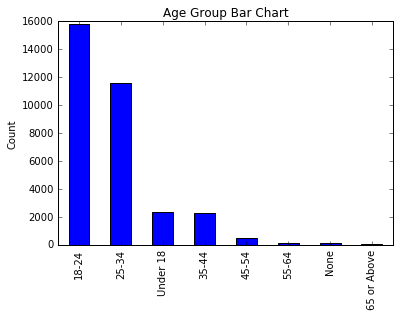

In [68]:
Age = rs.Age.value_counts().plot(kind = 'bar' )
Age.set_title("Age Group Bar Chart")
Age.set_xlabel("")
Age.set_ylabel("Count")

In [69]:
rs.Mari_Status.value_counts()

Single                                      10428
In a relationship                            9828
Forever Alone                                5850
Married/civil union/domestic partnership     5490
Engaged                                      1109
Widowed                                        44
Name: Mari_Status, dtype: int64

In [70]:
rs[rs.Mari_Status=="Blank"]

,EntryId,Gender,Age,Mari_Status,Emp_Status,Military_Service,Children_Under18,Education,Country,State,IncomeBeforeTaxes,Subreddit,like_CatsOrDogs,Cheese_You


In [71]:
rs = rs[ -(rs.Mari_Status == 'Blank')] 

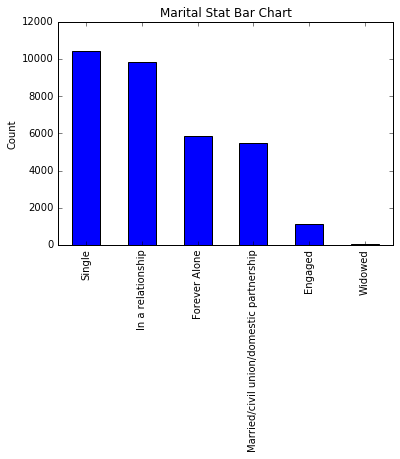

In [72]:
M_S = rs.Mari_Status.value_counts().plot(kind = 'bar' )
M_S.set_title("Marital Stat Bar Chart")
M_S.set_xlabel("")
M_S.set_ylabel("Count")

In [73]:
rs.Emp_Status.value_counts()

Employed full time                       14811
Student                                  12987
Not employed, but looking for work        2087
Freelance                                 1946
Not employed and not looking for work      682
None                                       151
Retired                                     85
Name: Emp_Status, dtype: int64

In [74]:
rs.Emp_Status.describe()

count                  32749
unique                     7
top       Employed full time
freq                   14811
Name: Emp_Status, dtype: object

In [75]:
rs[rs.Emp_Status.isnull()]

,EntryId,Gender,Age,Mari_Status,Emp_Status,Military_Service,Children_Under18,Education,Country,State,IncomeBeforeTaxes,Subreddit,like_CatsOrDogs,Cheese_You


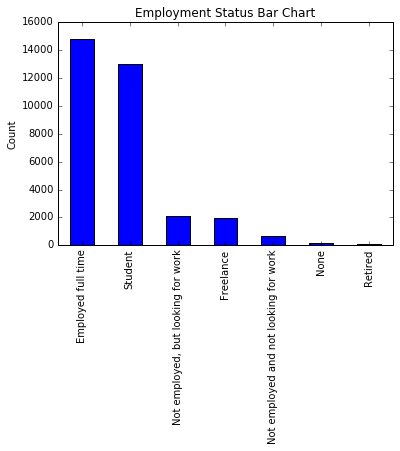

In [76]:
E_S = rs.Emp_Status.value_counts().plot(kind = 'bar' )
E_S.set_title("Employment Status Bar Chart")
E_S.set_xlabel("")
E_S.set_ylabel("Count")

In [86]:
rs.Military_Service.value_counts()

No     30526
Yes     2223
Name: Military_Service, dtype: int64

In [87]:
rs.Military_Service.describe()

count     32749
unique        2
top          No
freq      30526
Name: Military_Service, dtype: object

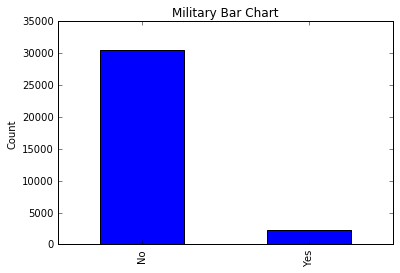

In [88]:
M_S = rs.Military_Service.value_counts().plot(kind = 'bar' )
M_S.set_title("Military Bar Chart")
M_S.set_xlabel("")
M_S.set_ylabel("Count")

In [89]:
rs[rs.Military_Service=="None"]

,EntryId,Gender,Age,Mari_Status,Emp_Status,Military_Service,Children_Under18,Education,Country,State,IncomeBeforeTaxes,Subreddit,like_CatsOrDogs,Cheese_You


In [90]:
rs.Children_Under18.value_counts()

No      27483
Yes      5047
None      219
Name: Children_Under18, dtype: int64

In [91]:
rs[rs.Children_Under18.isnull()]

,EntryId,Gender,Age,Mari_Status,Emp_Status,Military_Service,Children_Under18,Education,Country,State,IncomeBeforeTaxes,Subreddit,like_CatsOrDogs,Cheese_You


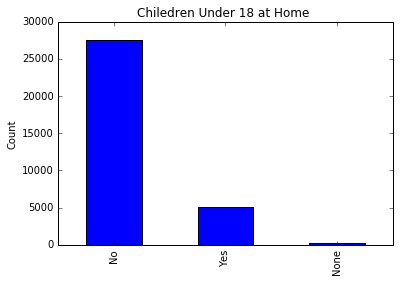

In [92]:
Children_Under18 = rs.Children_Under18.value_counts().plot(kind = 'bar' )
Children_Under18.set_title("Chiledren Under 18 at Home ")
Children_Under18.set_xlabel("")
Children_Under18.set_ylabel("Count")

In [93]:
rs[rs.Children_Under18=="None"]

,EntryId,Gender,Age,Mari_Status,Emp_Status,Military_Service,Children_Under18,Education,Country,State,IncomeBeforeTaxes,Subreddit,like_CatsOrDogs,Cheese_You
318,319,Male,35-44,In a relationship,Employed full time,Yes,None,Some college,United States,Minnesota,"$50,000 - $69,999",NaN,I like cats.,Goat
552,553,Male,18-24,Single,Student,No,None,Bachelor's degree,United States,Massachusetts,"$70,000 - $99,999",fffffffuuuuuuuuuuuu,I like dogs.,American
675,676,None,None,Forever Alone,None,Yes,None,None,United States,Arizona,none,NaN,I like dogs.,Cheddar
1043,1044,Male,18-24,In a relationship,Student,No,None,Some college,Canada,NaN,"Under $20,000",rowing,I like cats.,Cheddar
1145,1146,Male,Under 18,In a relationship,Student,No,None,Some high school,United States,Arkansas,"$40,000 - $49,999",fffffffuuuuuuuuuuuu,I like dogs.,Provolone
1203,1204,Male,35-44,Married/civil union/domestic partnership,Employed full time,No,None,Graduate or professional degree,Italy,NaN,"$20,000 - $29,999",truereddit,I like dogs.,Other
1385,1386,Male,18-24,Single,Student,No,None,High school graduate or equivalent,United States,New York,"$70,000 - $99,999",askreddit,I like dogs.,Other
1493,1494,Male,25-34,In a relationship,Employed full time,No,None,Bachelor's degree,france,NaN,"$40,000 - $49,999",iama,I like cats.,Other
1565,1566,None,None,Forever Alone,None,Yes,None,None,none,NaN,"$70,000 - $99,999","tf2, ireland",I like dogs.,Goat
1616,1617,Male,18-24,In a relationship,Employed full time,No,None,Graduate or professional degree,United States,California,"$30,000 - $39,999",NaN,I like turtles.,Brie


In [97]:
rs.Education.value_counts()

Bachelor's degree                     11042
Some college                           9599
Graduate or professional degree        4722
High school graduate or equivalent     3272
Some high school                       1924
Associate degree                       1411
Trade or Vocational degree              635
None                                    144
Name: Education, dtype: int64

In [98]:
rs.Education.describe()

count                 32749
unique                    8
top       Bachelor's degree
freq                  11042
Name: Education, dtype: object

In [99]:
rs[rs.Education.isnull()]

,EntryId,Gender,Age,Mari_Status,Emp_Status,Military_Service,Children_Under18,Education,Country,State,IncomeBeforeTaxes,Subreddit,like_CatsOrDogs,Cheese_You


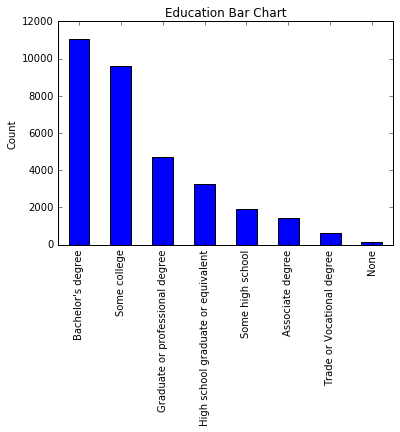

In [100]:
Education = rs.Education.value_counts().plot(kind = 'bar' )
Education.set_title("Education Bar Chart")
Education.set_xlabel("")
Education.set_ylabel("Count")

In [101]:
rs.Country.describe()

count             32749
unique              440
top       United States
freq              20962
Name: Country, dtype: object

In [102]:
rs.Country.value_counts()

United States                       20962
Canada                               2888
United Kingdom                       1782
Australia                            1051
Germany                               407
New Zealand                           315
Sweden                                309
Norway                                288
Ireland                               242
Finland                               188
Denmark                               182
none                                  177
India                                 154
France                                142
The Netherlands                       141
Netherlands                           134
Belgium                               119
Poland                                112
Brazil                                111
Mexico                                108
Spain                                 100
canada                                 97
Portugal                               87
Switzerland                       

In [103]:
rs[rs.Country.isnull()]

,EntryId,Gender,Age,Mari_Status,Emp_Status,Military_Service,Children_Under18,Education,Country,State,IncomeBeforeTaxes,Subreddit,like_CatsOrDogs,Cheese_You


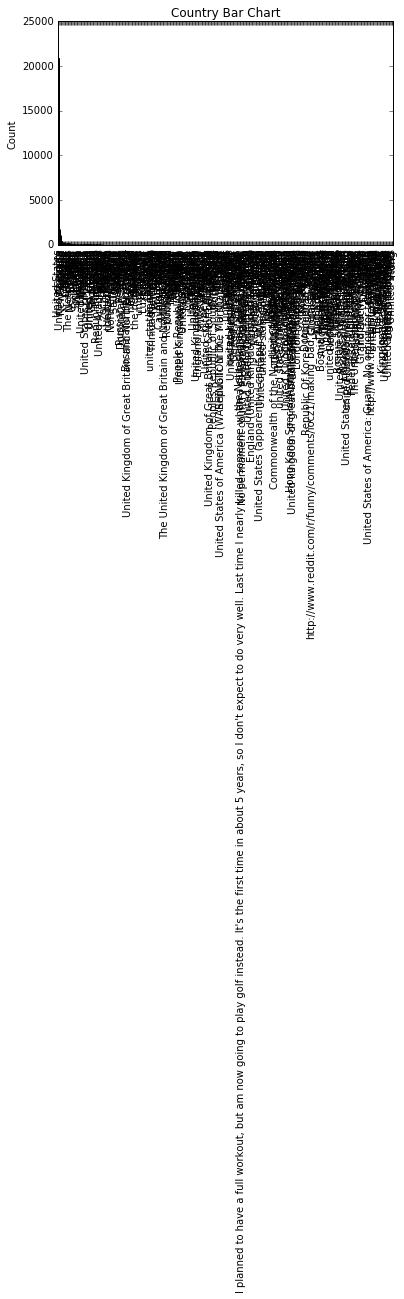

In [104]:
Country = rs.Country.value_counts().plot(kind = 'bar' )
Country.set_title("Country Bar Chart")
Country.set_xlabel("")
Country.set_ylabel("Count")

In [106]:
rs.IncomeBeforeTaxes.value_counts()

Under $20,000          7891
$50,000 - $69,999      4133
$70,000 - $99,999      4100
$100,000 - $149,999    3522
$20,000 - $29,999      3206
$30,000 - $39,999      2904
$150,000 or more       2692
$40,000 - $49,999      2686
none                   1615
Name: IncomeBeforeTaxes, dtype: int64

In [107]:
rs.IncomeBeforeTaxes.describe()

count             32749
unique                9
top       Under $20,000
freq               7891
Name: IncomeBeforeTaxes, dtype: object

In [108]:
rs[rs.IncomeBeforeTaxes.isnull()]

,EntryId,Gender,Age,Mari_Status,Emp_Status,Military_Service,Children_Under18,Education,Country,State,IncomeBeforeTaxes,Subreddit,like_CatsOrDogs,Cheese_You


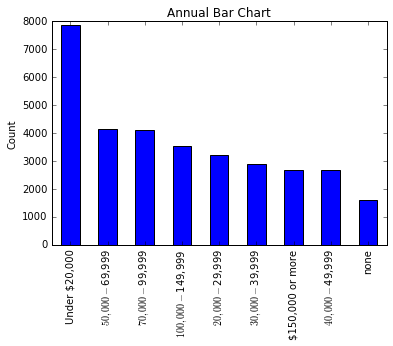

In [109]:
IncomeBeforeTaxes=rs.IncomeBeforeTaxes.value_counts().plot(kind = 'bar' )
IncomeBeforeTaxes.set_title("Annual Bar Chart")
IncomeBeforeTaxes.set_xlabel("")
IncomeBeforeTaxes.set_ylabel("Count")

In [110]:
rs.Subreddit.value_counts()

askreddit                                        2123
fffffffuuuuuuuuuuuu                              1746
pics                                             1651
trees                                            1311
gaming                                           1206
funny                                            1092
atheism                                           839
askscience                                        779
all                                               647
todayilearned                                     645
starcraft                                         611
iama                                              576
minecraft                                         520
f7u12                                             515
programming                                       501
twoxchromosomes                                   396
science                                           378
truereddit                                        347
wtf                         

In [113]:
del rs["Subreddit"]
del rs['EntryId']

In [119]:
rs.like_CatsOrDogs.value_counts()

I like dogs.       17149
I like cats.       11152
I like turtles.     4442
askreddit              2
 Reddit.com            1
movies                 1
Name: like_CatsOrDogs, dtype: int64

In [120]:
rs.like_CatsOrDogs.describe()

count            32747
unique               6
top       I like dogs.
freq             17149
Name: like_CatsOrDogs, dtype: object

In [122]:
rs.loc[rs['like_CatsOrDogs'] == 'I like turtles.', 'like_CatsOrDogs'] = 'none'
rs.loc[rs['like_CatsOrDogs'] == 'askreddit.', 'like_CatsOrDogs'] = 'none'
rs.loc[rs['like_CatsOrDogs'] == 'askreddit', 'like_CatsOrDogs'] = 'none'
rs.loc[rs['like_CatsOrDogs'] == ' Reddit.com', 'like_CatsOrDogs'] = 'none'
rs.loc[rs['like_CatsOrDogs'] == 'movies', 'like_CatsOrDogs'] = 'none'

In [123]:
rs.like_CatsOrDogs.value_counts()

I like dogs.    17149
I like cats.    11152
none             4446
Name: like_CatsOrDogs, dtype: int64

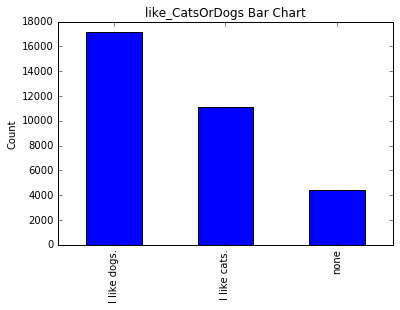

In [124]:
 like_CatsOrDogs=rs.like_CatsOrDogs.value_counts().plot(kind = 'bar' )
like_CatsOrDogs.set_title("like_CatsOrDogs Bar Chart")
like_CatsOrDogs.set_xlabel("")
like_CatsOrDogs.set_ylabel("Count")

In [125]:
rs.Cheese_You.value_counts()

Other            6562
Cheddar          6101
Brie             3742
Provolone        3454
Swiss            3214
Feta             2991
Goat             2516
Munster          1770
American         1438
Paneer            618
Limburger         337
 f7u12              2
 Pics               1
 awww               1
1                   1
programming')       1
Name: Cheese_You, dtype: int64

In [126]:
rs.Cheese_You.describe()

count     32749
unique       16
top       Other
freq       6562
Name: Cheese_You, dtype: object

In [127]:
rs.Cheese_You.value_counts()

Other            6562
Cheddar          6101
Brie             3742
Provolone        3454
Swiss            3214
Feta             2991
Goat             2516
Munster          1770
American         1438
Paneer            618
Limburger         337
 f7u12              2
 Pics               1
 awww               1
1                   1
programming')       1
Name: Cheese_You, dtype: int64

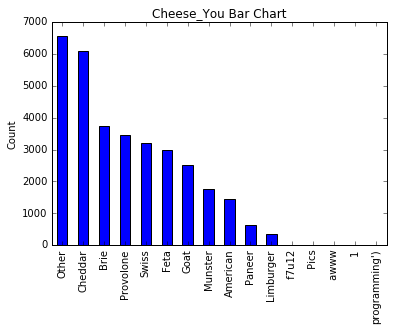

In [128]:
Cheese_You=rs.Cheese_You.value_counts().plot(kind = 'bar' )
Cheese_You.set_title("Cheese_You Bar Chart")
Cheese_You.set_xlabel("")
Cheese_You.set_ylabel("Count")

In [129]:
Asia=['Afghanistan' ,'Armenia','Azerbaijan','Bahrain','Bangladesh' ,'Bhutan' ,
      'Brunei', 'Cambodia','China', 'Cyprus' , 'Georgia', 'India', 'Indonesia' , 'Iran', 'Iraq', 'Israe' , 'Japan', 
      'Jordan' , 'Kazakhstan' , 'Kuwait', 'Kyrgyzstan' , 'Laos', 'Lebanon', 'Malaysia' , 'Maldives', 'Mongolia', 'Myanmar' ,
      'Nepal' ,'North Korea', 'Oman','Pakistan', 'Palestine' ,'Philippines', 'Qatar','Russia', 'Saudi Arabia', 'Singapore',
      'South Korea','Sri Lanka', 'Syria' , 'Taiwan', 'Tajikistan' , 'Thailand', 'Timor-Leste', 'Turkey', 'Turkmenistan', 
      'United Arab Emirates', 'Uzbekistan' , 'Vietnam' , 'Yemen','Israel','Kuwait','india','thailand', 'Korea, South'
      'JAPAN', 'INDIA','japan','malaysia','Hong Kong'
     ]
Africa=[
    'Algeria','Angola','Benin','Botswana','Burkina Faso','Burundi','Cabo Verde',
'Cameroon','Central African Republic','Chad',
'Comoros','Democratic Republic of the Congo','Republic of the Congo',
'Cote d Ivoire','Djibouti','Egypt','Equatorial Guinea','Eritrea','Ethiopia','Gabon','Gambia','Ghana','Guinea',
'Guinea-Bissau','Kenya','Lesotho','Liberia','Libya','Madagascar','Malawi','Mali','Mauritania','Mauritius','Morocco',
'Mozambique','Namibia','Niger','Nigeria', 'Rwanda','Sao Tome and Principe','Senegal','Seychelles','Sierra Leone',
'Somalia','South Africa','South Sudan','Sudan','Swaziland' ,'Tanzania','Togo','Tunisia','Uganda' ,'Zambia','Zimbabwe'
        ]
Antartica=['Antarctica']
Australia=['Australia', 'Fiji', 'Kiribati', 'Marshall Islands', 'Micronesia', 'Nauru', 'New Zealand', 'Palau',
           'Papua New Guinea' ,'Samoa', 'Solomon Islands' ,'Tonga' ,'Tuvalu' ,'Vanuatu','australia']
Europe=['United kingom','United kingdom ','Croatua','switzerland','ITALY IT','england','England','SPAIN','Itaky',
        'Scotland and Sweden','NORWAY', 'DENMARK','Austria','austria'
       'United kingdom of great britain and northern Ireland','Unitd Kingdom',
        'british virgin islands','BG','Denmark ','Serbia','serbia','UNited Kingdom','Galiza','The Netherlands','Netherlands, the',
       'Belgrium', 'slovenia','united kingdom / scotland', 'United Kingdom of Great Britain','uk','Czech republic',
        'United Kingdo,','Great Britian ','the Netherlands (a.k.a. Holland)',
        'Slovak Republic','Norway.','Australia and United Kingdom','IRELAND','England (United Kingdom is not a country)',
        'Bosnia And Herzegovina','Catalonia','new Zealand ','Newzealand ', 'FUNLAND','Belgrium','slovenia',
        'Republic of Ireland','Republic of Ireland ','BELGIUM','Peoples Republic of South Yorkshire',
        'United Kingdon', 'wales','norway', 'Swedeb','Netehrlands','Kingdom of Norway',
         'Holland','Federal Republic of Germany','United Kingdom (England)', 'United KIngdom',
        'England','Scotland','FRANCE','romania','Northern Ireland','sweden','Sweden',
        'Federal Republic of Germany','The NEtherlands','denmark','FUNLAND','Belgrium','Nether',
        'Commonwealth of the Northern Mariana Islands','Helsinki','U.K lol', 'scotland',
        'UK','U.K.','estonia','London United Kingdom','Frande','poland', 'U.K. Problem?',
        'Lithuania/United Kingdom','Kosova','Kosovo','U.K','United ','Denmark','United Kingdom','Belgium','Italy','italy','Romania',
           'Germany', 'France', 'Greece', 'Switzerland','Netherlands', 'Bulgaria', 'Spain', 'Poland', 'Finland',
         'the Netherlands','Slovenia','Iceland','Bosnia and Herzegovina','Croatia','united kingdom',
          'New Zealand','Estonia','Puerto Rico','Portugal','Slovakia','Ukraine', 'Macedonia','Czech Republic',
        'Lithuania','United Kingdom (Scotland)','Swiss','Bermuda','Dominica','United Jingdom', 'Gibraltar', 'ireland',
         'Hungary','Uninted Kingdom','Isle of Man','Luxembourg','Swedem','Wales', 'Latvia', 'POLAND',
           'u.k', 'United  Kingdom', 'spain', 'germany','new zealand','Equestria',
           'United Kingdom of Great Britain and Northern Ireland','Republic of Poland', 'Honduras','ENGLAND', 'GErmany', 'greece',  
         'Ger','finland','iceland','belgium', 'Sweden ','Republic Of Ireland','England ','Great Britain','New zealand', 'New Zealand ',
        'The United Kingdom of Great Britain and Northern Ireland','Albania',
        'Grand Duchy of Baden','United Kingdown','Faroe Islands','Portugal',
       'Untied Kingdom ', 'The Czech Republic','Montenegro','Antigua and Barbuda','United Kindom',' United Kingdom',
        'The Republic of Ireland', 'Australia ','Andorra','czech republic','Untied Kingdom','St.Vincent', 'Ireland ',
        'united kingdom of great Britain ','UNITED KINGDOM','united kingdom ','Unted Kingdom','New Zealanad','United Knigdom', 
        'Finland ', 'netherlands','The Netherlands ','Bosnia and Herzegowina','united kingdom, Spain ',
        'ITALY','croatia','Belarus','United Kingdom, India','Portugal ',
          'Ireland','United Kingdom ','Malta','france','United kingdom,England, United Kingdom','United kingdom',
            'England, United Kingdom','Germany ','Republic of Moldova','the netherlands',
            'United Kingdom of Great Britain & Northern Ireland','Frabce','Swden','Moldova']
North_America=['United States','canada','Trinidad and TObago','Commonwealth of the Northern Mariana Islands',
               'Republic of the Marshall Islands','united states of America ','Amurika',
               'Belgium/Canada','america','haiti','United Strate','Canada, Eh','United s',
               'The Dominion of Canada','United States (Guam)','Ontario, Canada','united states (my state is APO) ',
               'Mx','Mexico','mexico','Canada, Bitches.','United States of America (Washington, DC)',
               'United States of America (WASHINGTON DC, Y U NO LISTED?)','US OF A','U.S','USA ','California',
               "United States (apparently I can't put D.C. as my state)",'united states', 'united states :f',
               'United States, District of Columbia','U S A','USVI','america','united Sr','Idaho'
               ,'Canada (currently Korea)','Canada','CANADA','Norway',
               'United states of America. ','Costa Rica','M\xc3\xa9xico','Barbados','Canada, eh?',
                'United states of America', 'United States of ', 
                'United States of America (DC)','Trinidad & Tobago',
                'Belize','Dominion of Canada', 'Toronto','El Salvador','Canadia','Trinidad and Tobago',
                'Cayman Islands','Amerikka', 'Guatemala','United States ', 'US','united stateds','Amerikka', 'Guatemala','MEXICO  ',
               'United States of America: Guam. No option for territories :(','United states',
                'Sint Maarten','united sates','The United States of America','Usa', 'United st','Mexico ',
                'united States','Unnited States','Bahamas',' Canada','canada ', 'United States of America ', 
                'United States Of America', 'Guam', 'usa','greenland','Camada','U.S.A.','Canda','Unites States','Panama',
              'United Sates','Canada ','united states of america','United States of America', 'Cananda',
              'United States of American','United States (Washington, DC)','united states of American', 
               'Nicaragua','MEXICO','USA',' Canada eh'] 
South_America=['Chile','Argentina','Bolivia','Brazil','Colombia','Ecuador',
               'French Guiana','Guyana','Paraguay','brazil','Brasil','chile','Uruguay ','venezuela','Peru','Suriname','argentina','colombia','Venezuela',
               'ecuador','Brazilf','Uruguay']

In [131]:
Continents = []
NOT_present=[]
for i in rs['Country']:
    cont=''
    try:
        cont=transformations.cn_to_ctn(i)
        Continents.append[cont]
    except:
        if(i in Asia):
            cont="Asia"
            Continents.append(cont)
        elif(i in Africa):
            cont="Africa"
            Continents.append(cont)
        elif(i in Australia):
            cont="Australia"
            Continents.append(cont)
        elif(i in Antartica): 
            cont="Antartica"
            Continents.append(cont)
        elif(i in Europe):
            cont="Europe"
            Continents.append(cont)
        elif(i in North_America):
            cont="North America"
            Continents.append(cont)
        elif(i in South_America):
            cont="South America"
            Continents.append(cont)
        else:
            cont="None" 
            Continents.append(cont) 
            NOT_present.append(i)

In [132]:
Continents

['North America',
 'Europe',
 'North America',
 'North America',
 'Europe',
 'North America',
 'North America',
 'North America',
 'Europe',
 'North America',
 'North America',
 'North America',
 'Europe',
 'Europe',
 'North America',
 'Europe',
 'Europe',
 'Europe',
 'North America',
 'Europe',
 'North America',
 'North America',
 'North America',
 'North America',
 'North America',
 'North America',
 'North America',
 'North America',
 'North America',
 'North America',
 'Europe',
 'North America',
 'North America',
 'North America',
 'North America',
 'North America',
 'North America',
 'North America',
 'North America',
 'North America',
 'North America',
 'North America',
 'North America',
 'Europe',
 'Europe',
 'Europe',
 'North America',
 'North America',
 'North America',
 'North America',
 'Europe',
 'Europe',
 'North America',
 'North America',
 'Europe',
 'North America',
 'Europe',
 'North America',
 'North America',
 'Australia',
 'North America',
 'North America',
 'North

In [133]:
rs['Continents']=Continents


In [134]:
rs['Continents']=Continents

In [135]:
rs.Continents.value_counts()

North America    24592
Europe            5247
Australia         1392
Asia               841
South America      281
None               279
Africa             115
Antartica            2
Name: Continents, dtype: int64

In [137]:
rs.Continents.describe()

count             32749
unique                8
top       North America
freq              24592
Name: Continents, dtype: object

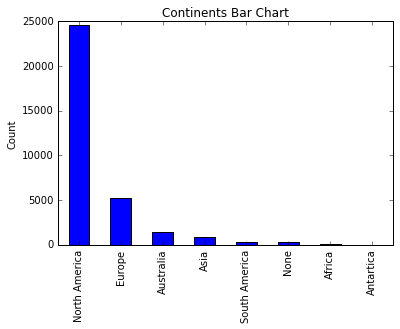

In [138]:
C=rs.Continents.value_counts().plot(kind = 'bar' )
C.set_title("Continents Bar Chart")
C.set_xlabel("")
C.set_ylabel("Count")

NameError: name 'r' is not defined